# Uppgift 1 #
## Pythprog AI, fall 2022 ##

By Rikard Lang

## The task ##

The task is to find an interesting and somewhat large dataset, reason about it in a semi-intelligent way and present your findings.

## The dataset ##

The dataset I picked is called **Historical weather data of 194 country capitals** and can be found here: https://www.kaggle.com/datasets/balabaskar/historical-weather-data-of-all-country-capitals?resource=download

In [4]:
import pandas as pd

df = pd.read_csv('./data/daily_weather_data.csv')
df.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


## Getting a first look at the data ##

First of all I import pandas, this is to help me out with creating a dataframe that will be amenable to reasoning and look at the data in greater detail. I import the csv-data and run df.head() to get a first proper look at what the data looks like.

I can see that the table contains 11 columns and when looking at the source of the data, the columns represent the following:

1. **date** *the date in day/month/year format*

2. **country** *The country where the measurement was taken*

3. **city** *The city where the measurement was taken and in this specific case, also the capitol of the country*

4. **Latitude** *The latitude of the city*

5. **Longitude** *The longitude of the city*

6. **tavg** *The average temperature, in celcius on this specific date*

7. **tmin** *The lowest temperature measured on this specific date*

8. **tmax** *The highest temperature measured on this specific date*

9. **wdir** *The average wind direction in degrees*

10. **wspd** *The average wind speed in km/h*

11. **pres** *The average sea-level air pressure in hPa*

In [10]:
df.shape

(324647, 11)

In [12]:
df.dtypes

date          object
country       object
city          object
Latitude     float64
Longitude    float64
tavg         float64
tmin         float64
tmax         float64
wdir         float64
wspd         float64
pres         float64
dtype: object

In [26]:
df.isnull().sum()

date             0
country          0
city             0
Latitude         0
Longitude        0
tavg          9684
tmin         12363
tmax         12378
wdir         40710
wspd         22247
pres         35231
dtype: int64

## Looking a little closer at the data ##

df.shape tells me that there are 11 columns and a whopping 324647 rows of data. Looking a little closer at the source of the data I come to the conclusion that it represents data between 2018 to 2022. We haven't quite reached the end of 2022, so obviously the data isn't complete - not even within the stated time period.

In [13]:
df.date.min()

'01-01-2018'

In [14]:
df.date.max()

'31-12-2021'

## A concrete finding ##

Running the min and max on the date tells us that the first date recorded in the data is on *01-01-2018* and the last recorded date is *31-12-2021*. So the stated range 2018 - 2022 is simply excluding the year of 2022. Better keep that in mind.

In [16]:
df.corr()

/var/folders/vs/plw19_jx3311jw4q64_4tk_00000gn/T/ipykernel_40339/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
Latitude,1.000000,0.018383,-0.450550,-0.489185,-0.402915,0.118112,-0.112119,0.175629
Longitude,0.018383,1.000000,0.007061,0.009077,0.023888,0.091869,-0.140610,-0.097344
tavg,-0.450550,0.007061,1.000000,0.970513,0.977684,-0.151093,-0.071084,-0.232118
tmin,-0.489185,0.009077,0.970513,1.000000,0.914314,-0.158582,-0.004403,-0.246323
tmax,-0.402915,0.023888,0.977684,0.914314,1.000000,-0.136930,-0.133706,-0.208895
wdir,0.118112,0.091869,-0.151093,-0.158582,-0.136930,1.000000,-0.043831,-0.096979
wspd,-0.112119,-0.140610,-0.071084,-0.004403,-0.133706,-0.043831,1.000000,-0.115340
pres,0.175629,-0.097344,-0.232118,-0.246323,-0.208895,-0.096979,-0.115340,1.000000


## A warning from the future ##

So, we get a slight warning from the future, Pandas has informed us but not stopped our request, for now. This is a lot of data and it's hard to draw any conclusions from them. Let's look more deeply into a subset of the data instead. 

In [18]:
df_interesting = df[["tavg","wspd","pres"]]
df_interesting.head()

,tavg,wspd,pres
0,23.4,9.3,1009.6
1,23.5,9.4,1010.0
2,23.5,8.2,1007.7
3,24.3,9.3,1004.4
4,26.5,9.7,1002.0


Here we create a dataframe called df_interesting and select *the average temperature*, *windspeed* and *atmospheric pressure*.

In [19]:
df_interesting.corr()

,tavg,wspd,pres
tavg,1.000000,-0.071084,-0.232118
wspd,-0.071084,1.000000,-0.115340
pres,-0.232118,-0.115340,1.000000


<AxesSubplot: >

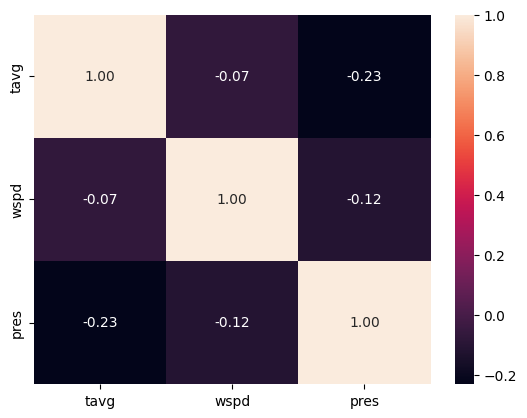

In [21]:
import seaborn as sns

sns.heatmap(df_interesting.corr(), annot=True, fmt='.2f')

I import seaborn to be able to plot a heatmap but I guess the data isn't all that interesting, or rather no proper correlation can be drawn between the average temperature, windspeed and atmospheric pressure.

## A new approach ##

So the above didn't give us any concrete results, so a new approach is needed. Perhaps we can look if there is a correlation between the average temperature and latitude, longitude. Let's give it a try.

In [22]:
df_more_interesting = df[["tavg","Latitude", "Longitude"]]
df_more_interesting.head()

,tavg,Latitude,Longitude
0,23.4,43.001525,41.023415
1,23.5,43.001525,41.023415
2,23.5,43.001525,41.023415
3,24.3,43.001525,41.023415
4,26.5,43.001525,41.023415


Ok, a new and thoughtfully named dataframe df_more_interesting is created, now let's see if that makes any difference.

In [23]:
df_more_interesting.corr()

,tavg,Latitude,Longitude
tavg,1.000000,-0.450550,0.007061
Latitude,-0.450550,1.000000,0.018383
Longitude,0.007061,0.018383,1.000000


<AxesSubplot: >

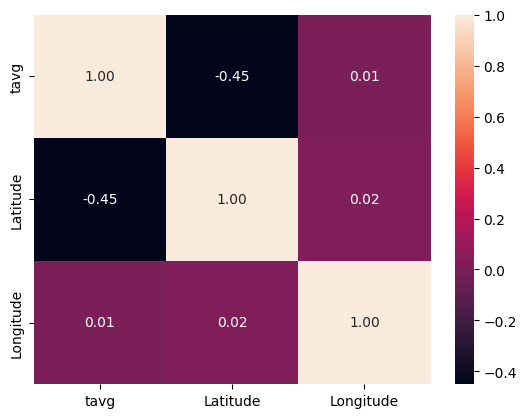

In [24]:
sns.heatmap(df_more_interesting.corr(), annot=True, fmt='.2f')

That didn't yield any new revelations, let's instead look at the complete dataset sans the country and city names. Perhaps that will give us deeper insights.

/var/folders/vs/plw19_jx3311jw4q64_4tk_00000gn/T/ipykernel_40339/2319445974.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<AxesSubplot: >

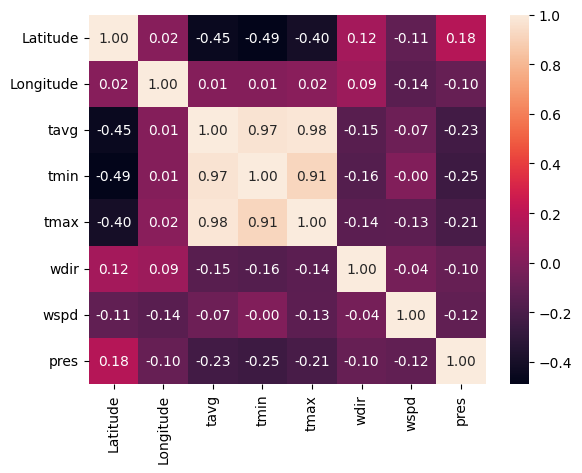

In [25]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

## Lots of data ##

So, this shows some correlation between the average temperatures, minumum and maximum temperatures, that is to be expected. 

## A small insight ##

Latitude - the north/south position, seems to have some correlation with average, min and maximum temperature. That is also expected, the further north you get on the northern hemisphere the colder it will get, and on the southern hemisphere, going south will get colder. Longitude does not show much of any correlation at all, some slight signs of windspeed and pressure, but those are very slight.

## An ideal amount of pressure is good ##

Pressure also shows some correlation with average, minimum and maximum temperature.

## A neophyte's take ##

I am not a meteorologist so the above findings are rudimentary at best

In [27]:
df.describe()

,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
count,324647.000000,324647.000000,314963.000000,312284.000000,312269.000000,283937.000000,302400.000000,289416.000000
mean,19.557777,13.989870,21.023282,17.395555,25.042591,163.814931,13.320338,1013.275333
std,26.076725,76.541269,9.309077,9.384259,9.769574,101.923106,7.309672,7.166760
min,-54.430000,-176.176447,-33.800000,-39.300000,-27.300000,0.000000,0.000000,860.200000
25%,4.922420,-51.694138,15.600000,11.300000,19.800000,81.000000,8.100000,1009.900000
50%,18.067519,13.289437,25.000000,21.300000,28.600000,142.000000,11.600000,1012.900000
75%,41.902179,51.531040,27.500000,24.500000,31.200000,251.000000,16.900000,1016.800000
max,78.062000,179.198128,44.100000,38.500000,89.600000,360.000000,105.500000,1058.000000


## Looking at it again ##

Looking at all the data again, it's interesting to note that the average of the average temperature is ~21 degrees celsius.

The minimum recorded temperature is -39.3 degrees celsius, that is indeed cold.

If you need something a little warmer, the maximum recorded temperature is 89.6 degrees celsius. That is extremely hot.

## 89.6 ##

So, I wanted to look into if that number could be in the realm of possibility, or if it is a number more accurate to Mercury

Looking at https://en.wikipedia.org/wiki/Highest_temperature_recorded_on_Earth I found several relevant passages:

1. he current official highest registered air temperature on Earth is 56.7 °C (134.1 °F), recorded on 10 July 1913 at Furnace Creek Ranch, in Death Valley in the United States.

2. The standard measuring conditions for temperature are in the air, 1.5 metres (4 ft 11 in) above the ground, and shielded from direct sunlight.

3. Temperatures measured directly on the ground may exceed air temperatures by 30 to 50 °C (54 to 90 °F).[12] The theoretical maximum possible ground surface temperature has been estimated to be between 90 and 100 °C (194 and 212 °F) for dry, darkish soils of low thermal conductivity.

So the most likely reason for that outlier is that it was measured in the wrong way: faulty instrument, measured the ground temperature (for example the sand itself in a desert) etc.

## -39.3 ##

So, what about the coldest data point? Could that be in the realm of hyborian reality? Let's visit Wikipedia again: https://en.wikipedia.org/wiki/Lowest_temperature_recorded_on_Earth

1. The lowest natural temperature ever directly recorded at ground level on Earth is −89.2 °C (−128.6 °F; 184.0 K) at the then-Soviet Vostok Station in Antarctica on 21 July 1983 by ground measurements.

That means that the lowest reading in this dataset is certainly within the realms of possibility. It is nowhere near the coldest temperature ever recorded.



<AxesSubplot: xlabel='city'>

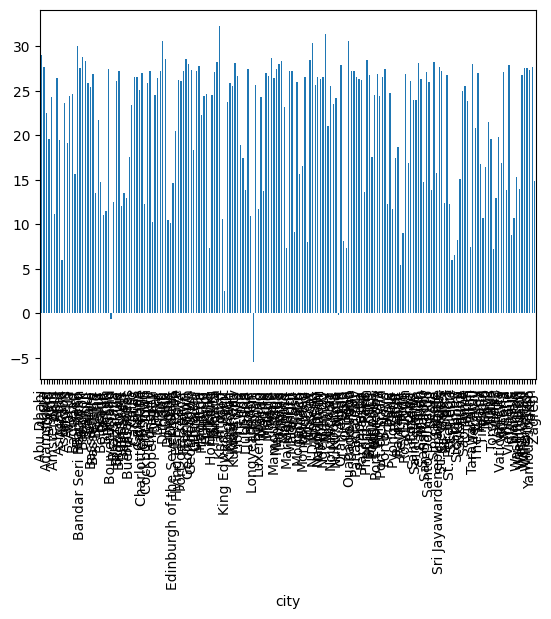

In [33]:
df.groupby(['city'])['tavg'].mean().plot.bar()

Showing the average temperature for **all** cities included isn't that very visually attractive. 

In [37]:
df_stockholm = df[df['city'] == "Stockholm"]

df_stockholm.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
282113,01-01-2018,Sweden,Stockholm,59.329323,18.068581,2.7,0.8,4.4,148.0,8.6,988.5
282114,02-01-2018,Sweden,Stockholm,59.329323,18.068581,2.7,1.2,3.6,216.0,10.2,995.1
282115,03-01-2018,Sweden,Stockholm,59.329323,18.068581,2.6,1.6,3.5,120.0,10.8,995.5
282116,04-01-2018,Sweden,Stockholm,59.329323,18.068581,2.5,2.0,3.0,58.0,13.5,990.5
282117,05-01-2018,Sweden,Stockholm,59.329323,18.068581,0.8,-1.5,1.9,332.0,8.7,989.9


In [49]:
df_stockholm.shape

(1745, 11)

I know this course is formally located in Gothenburg, but the dataset contains only Stockholm and that's a fact ;-)

/var/folders/vs/plw19_jx3311jw4q64_4tk_00000gn/T/ipykernel_40339/1314756275.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_stockholm.groupby(['city'])['tavg','tmin','tmax'].mean().plot.bar()


<AxesSubplot: xlabel='city'>

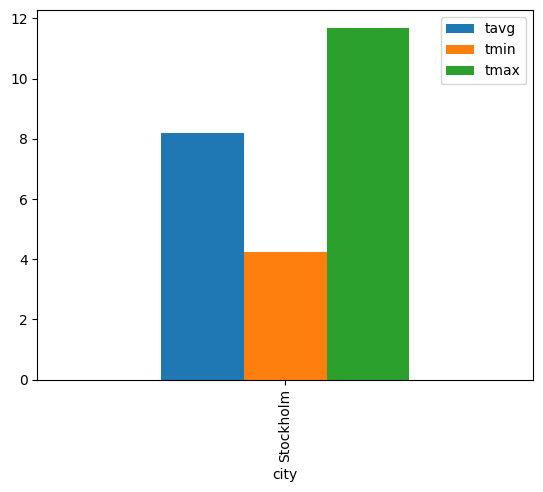

In [42]:
df_stockholm.groupby(['city'])['tavg','tmin','tmax'].mean().plot.bar()

These are the average temperatures (mean over the tavg, tmin and tmax) in Stockholm, Sweden over the course of the dataset.

<AxesSubplot: xlabel='city'>

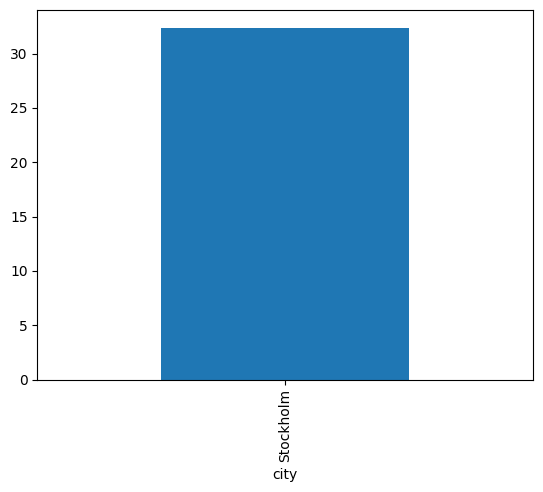

In [69]:
df_stockholm.groupby(['city'])['tmax'].max().plot.bar()

In [71]:
df_stockholm.groupby(['city'])['tmax'].max()

city
Stockholm    32.4
Name: tmax, dtype: float64

## Hottest ##

The highest recorded temperature in Stockholm, Sweden is 32.4 degrees celsius, in this dataset.

<AxesSubplot: xlabel='city'>

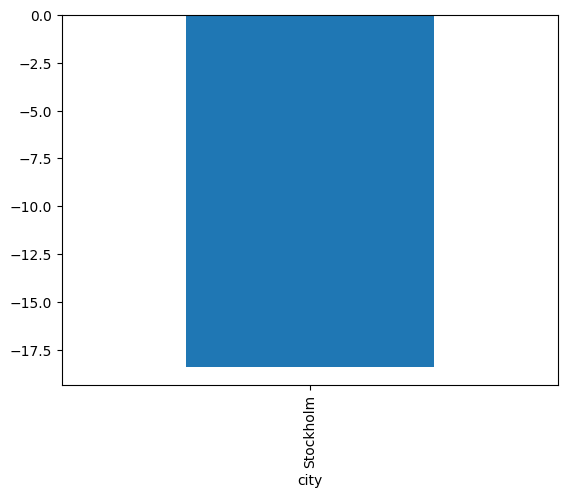

In [73]:
df_stockholm.groupby(['city'])['tmin'].min().plot.bar()

In [72]:
df_stockholm.groupby(['city'])['tmin'].min()

city
Stockholm   -18.4
Name: tmin, dtype: float64

## Coldest ##

And the lowest recorded temperature in Stockholm, Sweden is -18.4 degrees celsius, in this dataset.

In [74]:
df_stockholm.groupby(['city'])['tavg'].mean()

city
Stockholm    8.201385
Name: tavg, dtype: float64

<AxesSubplot: xlabel='city'>

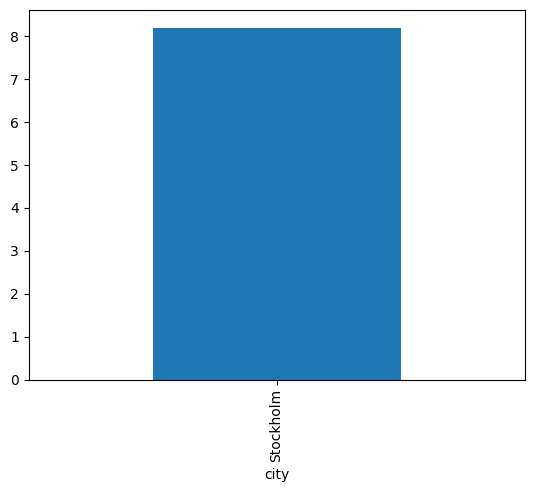

In [75]:
df_stockholm.groupby(['city'])['tavg'].mean().plot.bar()

## Meanest ##

Ok not really mean like **The Hulk**, but rather the average over the span of the dataset is 8.2 degrees celsius.

city
Stockholm    AxesSubplot(0.125,0.11;0.775x0.77)
Name: tavg, dtype: object

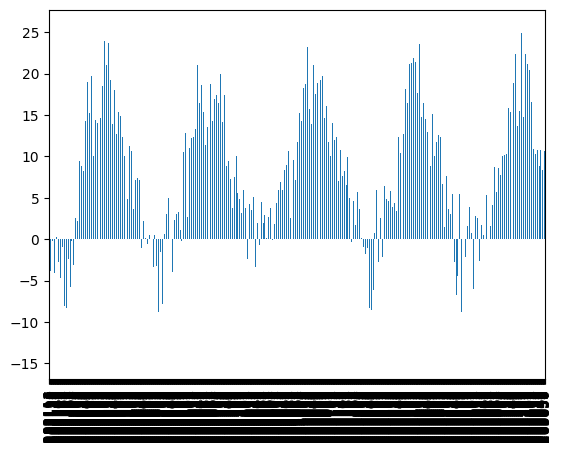

In [55]:
df_stockholm.groupby(['city'])['tavg'].plot.bar()

## Out of my depth ##

So, this is where I hit a bit of a wall, the **wall of ignorance**

I decided to have a look around the internet and see if someone had played around with Pandas and weather data.

I found this to be an interesting read: https://meteostat.net/en/blog/analyze-historical-weather-data-python

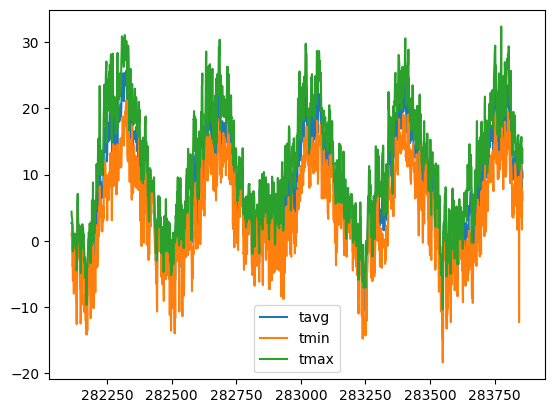

In [68]:

import matplotlib.pyplot as plt

df_stockholm.plot(y = ['tavg','tmin','tmax'], kind = 'line')

plt.show()

## A somewhat coherent graph ##

I managed to plot the relevant weather data for Stockholm but the dates are not in the correct format. **Note to self: fix this!**

## Conclusion ##

I learned a lot about the range of extreme temperatures on this planet and that was quite interesting. I feel a lot more comfortable using Python and the various data science tools; Pandas in particular. I like how it makes analyzing large amounts of data a fun puzzle-solving activity.





## The future ##

Will I keep working with this dataset for my AI project? Most likely no. I will look for a more interesting dataset according to my point of view. However, this exercise has certainly prepared me to handle datasets and think about them in a new way. For that, I thank you oh large weather dataset.